This codes were taken : https://www.analyticsvidhya.com/blog/2020/07/neural-networks-from-scratch-in-python-and-r/ 

In [7]:
# importing required libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# version of numpy library
print("Version of numpy:", np.__version__)
      
# version of matplotlib library
import matplotlib 

print("Version of matplotlib:", matplotlib.__version__)

Version of numpy: 1.19.5
Version of matplotlib: 3.2.2


Also, lets set the random seed parameter to a specific number (let’s say 42 (as we already know that is the answer to everything!)) so that the code we run gives us the same output every time we run (hopefully!)

In [11]:
# set random seed 
np.random.seed(42)

# creating the input array 

X = np.array([[1, 0, 0, 0], [1,0,1,1], [0,1,0,1]])
print("Input : \n" , X)

print("\n SHape of my heart : " , X.shape)

Input : 
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

 SHape of my heart :  (3, 4)


In [12]:
# converting the input in matrix form 
X = X.T
print('input in matrix form : \n' , X)

#shape of input matrix 
print('\n shape of input matrix : ' , X.shape)

input in matrix form : 
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

 shape of input matrix :  (4, 3)


In [13]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


#.

#MODEL ARCHITECTURE

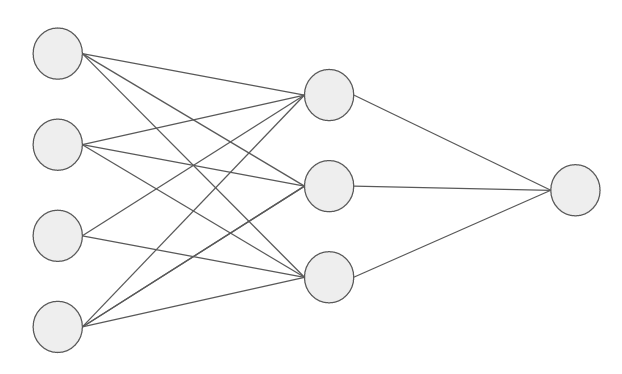

Now that our input and output data is ready, let’s define our neural network. We will define a very simple architecture, having one hidden layer with just three neurons

In [17]:
inputLayer_neurons = X.shape[0] # number of features in data set =(4,3) => 4
hiddenLayer_neurons = 3         # number of gidden layers neurons
outputLayer_neurons = 1         # number of neurons at output layer 

Then, we will initialize the weights for each neuron in the network. The weights we create have values ranging from 0 to 1, which we initialize randomly at the start.

In [19]:
#initializing weight 
# shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer

weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))

weights_input_hidden

array([[0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184]])

In [20]:
# shape of weight_hidden_output should number of neurons at hidden layer * number of neurons at output layer 

weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

weights_hidden_output

array([[0.45606998],
       [0.78517596],
       [0.19967378]])

In [22]:
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape# We are using sigmoid as an activation function so defining the sigmoid function here

((4, 3), (3, 1))

After this, we will define our activation function as sigmoid, which we will use in both the hidden layer and output layer of the network

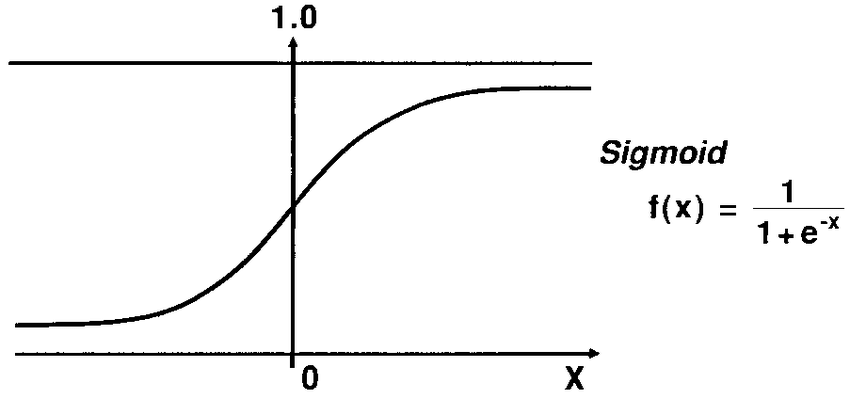

In [23]:
# we are using sigmoid as an activation function so defining the sigmoid function here 

# sigmoid function 

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [29]:
print(weights_input_hidden.T)

[[0.83244264 0.18340451 0.43194502 0.13949386]
 [0.21233911 0.30424224 0.29122914 0.29214465]
 [0.18182497 0.52475643 0.61185289 0.36636184]]


In [30]:
# hidden layer activations

hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

In [32]:
print(hiddenLayer_linearTransform)
print('-------------------------------------')
print(hiddenLayer_activations)

[[0.83244264 1.40388152 0.32289837]
 [0.21233911 0.7957129  0.59638689]
 [0.18182497 1.16003971 0.89111827]]
-------------------------------------
[[0.69687117 0.8027991  0.58003044]
 [0.55288622 0.68905668 0.64482925]
 [0.54533142 0.76133993 0.70912089]]


In [38]:
# calculating the output 

outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

In [39]:
# output 
output

array([[0.70283265, 0.74253437, 0.71349752]])

# We get an output for each sample of the input data. In this case, let’s calculate the error for each sample using the squared error loss

In [41]:
#calculating error 

error = np.square(y - output) / 2
error

array([[0.04415422, 0.03314427, 0.25453935]])

We have completed our forward propagation step and got the error. Now let’s do a backward propagation to calculate the error with respect to each weight of the neuron and then update these weights using simple gradient descent.

Firstly we will calculate the error with respect to weights between the hidden and output layers. Essentially, we will do an operation such as this

-> Rate of change of error w.r.t output

-> Rate of change of output w.r.t Z2

-> Rate of change of Z2 w.r.t weights between hidden and output layer



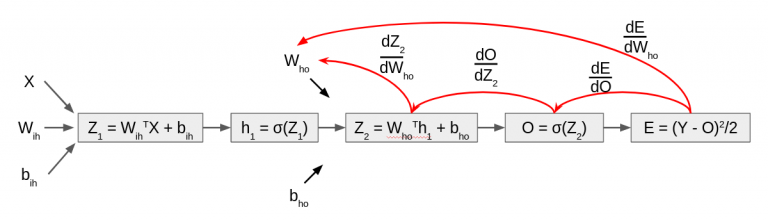

In [43]:
# rate of change of error w.r.t. output 

error_wrt_output = -(y - output)
error_wrt_output

array([[-0.29716735, -0.25746563,  0.71349752]])

In [45]:
# rate of change of output w.r.t. Z2

output_wrt_outputLayer_LinearTransform = np.multiply(output, (1-output))
output_wrt_outputLayer_LinearTransform

array([[0.20885892, 0.19117708, 0.20441881]])

In [47]:
# rate of change of Z2 w.r.t weight between hiddent and output layer 

outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations
outputLayer_LinearTransform_wrt_weights_hidden_output

array([[0.69687117, 0.8027991 , 0.58003044],
       [0.55288622, 0.68905668, 0.64482925],
       [0.54533142, 0.76133993, 0.70912089]])

In [48]:
#checking the shapes of partial derivatives

error_wrt_output.shape, output_wrt_outputLayer_LinearTransform.shape, outputLayer_LinearTransform_wrt_weights_hidden_output.shape

((1, 3), (1, 3), (3, 3))

In [49]:
# What we want is an output shape like this

# shape of weights of output layer

weights_hidden_output.shape

(3, 1)

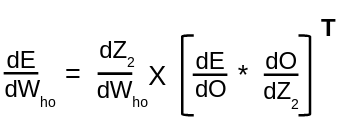

In [51]:
# rate of change of error w.r.t weight between hidden and output layer 

error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights_hidden_output,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T
)
error_wrt_weights_hidden_output

array([[0.00183174],
       [0.02581795],
       [0.03210604]])

In [52]:
error_wrt_weights_hidden_output.shape

(3, 1)

We get the output as expected.

 

Further, let’s perform the same steps for calculating the error with respect to weights between input and hidden – like this


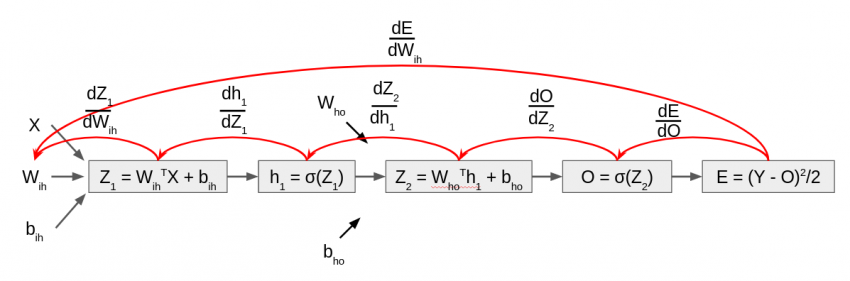


So by chain rule, we will calculate the following intermediate steps,

Rate of change of error w.r.t output

Rate of change of output w.r.t Z2

Rate of change of Z2 w.r.t hidden layer activations

Rate of change of hidden layer activations w.r.t Z1

Rate of change of Z1 w.r.t weights between input and hidden layer

In [54]:
# rate of change of error w.r.t. output
error_wrt_output = -(y - output)

In [55]:
# rate of change of output w.r.t Z2

output_wrt_outputLayer_LinearTransform = np.multiply(output, (1-output))
output_wrt_outputLayer_LinearTransform

array([[0.20885892, 0.19117708, 0.20441881]])

In [56]:
# rate of change of Z2 w.r.t. hidden layer activations
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
outputLayer_LinearTransform_wrt_hiddenLayer_activations

array([[0.45606998],
       [0.78517596],
       [0.19967378]])

In [58]:
# rate of change of hidden layer activations w.r.t. Z1
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
    hiddenLayer_activations, (1 - hiddenLayer_activations)
)
hiddenLayer_activations_wrt_hiddenLayer_linearTransform

array([[0.21124174, 0.1583127 , 0.24359513],
       [0.24720305, 0.21425757, 0.22902449],
       [0.24794506, 0.18170144, 0.20626845]])

In [59]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X
hiddenLayer_linearTransform_wrt_weights_input_hidden

array([[1, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [60]:
# checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    outputLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)

(1, 3) (1, 3) (3, 1) (3, 3) (4, 3)


In [61]:
# But what we want is an array of shape this

# shape of weights of hidden layer
weights_input_hidden.shape

(4, 3)

In [62]:
# rate of change of error w.r.t weights between input and hidden layer
error_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(
            outputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [63]:
error_wrt_weights_input_hidden.shape

(4, 3)

Now the next step is to update the parameters. For this, we will use vanilla gradient descent update function, which is as follows

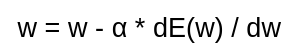

In [64]:
# defining the learning rate
lr = 0.01

In [65]:
# initial weights_hidden_output
weights_hidden_output

array([[0.45606998],
       [0.78517596],
       [0.19967378]])

In [66]:
# initial weights_input_hidden
weights_input_hidden

array([[0.83244264, 0.21233911, 0.18182497],
       [0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184]])

In [67]:
# updating the weights of output layer
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output

In [68]:

# updating the weights of hidden layer
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

In [69]:

# updated weights_hidden_output
weights_hidden_output

array([[0.45605167],
       [0.78491778],
       [0.19935272]])

In [70]:
# updated weights_input_hidden
weights_input_hidden

array([[0.83253797, 0.21254238, 0.18187355],
       [0.18324247, 0.30397996, 0.52469636],
       [0.43198056, 0.29131195, 0.61187075],
       [0.13936736, 0.29196518, 0.36631963]])

In [71]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 3  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 1000

In [72]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.11030
Error at epoch 100 is 0.10546
Error at epoch 200 is 0.10024
Error at epoch 300 is 0.09374
Error at epoch 400 is 0.08576
Error at epoch 500 is 0.07714
Error at epoch 600 is 0.06914
Error at epoch 700 is 0.06227
Error at epoch 800 is 0.05625
Error at epoch 900 is 0.05043


Our model seems to be performing better and better as the training continues. Let’s check the weights after the training is done

In [73]:
# updated w_ih
weights_input_hidden

array([[ 0.88610402,  1.74715317,  0.52277253],
       [-0.00944426, -1.71496733, -0.75886765],
       [ 1.05690739,  1.41925674,  0.9543233 ],
       [-0.20435349, -1.33419464,  0.00623974]])

In [74]:
# updated w_ih
weights_input_hidden

array([[ 0.88610402,  1.74715317,  0.52277253],
       [-0.00944426, -1.71496733, -0.75886765],
       [ 1.05690739,  1.41925674,  0.9543233 ],
       [-0.20435349, -1.33419464,  0.00623974]])

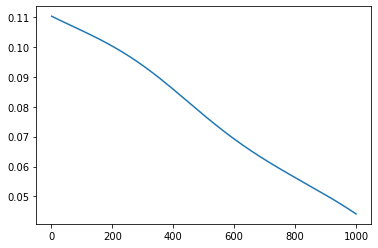

In [75]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [76]:
# final output from the model
output

array([[0.85349946, 0.84560895, 0.46850725]])

In [77]:
# actual target
y

array([[1, 1, 0]])

# Further, the next thing we will do is to train our model on a different dataset, and visualize the performance by plotting a decision boundary after training.



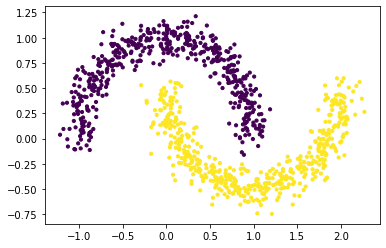

In [78]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [79]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [80]:
# We will normalize the input so that our model trains faster

X -= X.min()
X /= X.max()

In [81]:
X.min(), X.max()

(0.0, 1.0)

In [82]:
np.unique(y)

array([0, 1])

In [84]:
X.shape, y.shape

((1000, 2), (1000,))

In [86]:
X = X.T

y = y.reshape(1, -1)

In [87]:
X.shape, y.shape

((2, 1000), (1, 1000))

Now we will define our network. We will update the following three hyperparameters, namely

-> Change hidden layer neurons to be 10

-> Change the learning rate to be 0.1 

-> Train for more epochs

In [98]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer


In [99]:
# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

In [100]:
losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.21765
Error at epoch 1000 is 0.02400
Error at epoch 2000 is 0.01242
Error at epoch 3000 is 0.00761
Error at epoch 4000 is 0.00721
Error at epoch 5000 is 0.00662
Error at epoch 6000 is 0.00654
Error at epoch 7000 is 0.00640
Error at epoch 8000 is 0.00589
Error at epoch 9000 is 0.00570


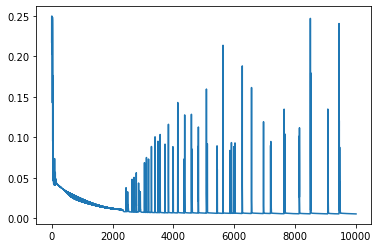

In [101]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))

In [102]:
# final output from the model
output[:, :5]

array([[9.78156328e-01, 9.92062755e-01, 9.83168150e-01, 9.98655570e-01,
        3.66814066e-09]])

In [103]:
y[:, :5]

array([[1, 1, 1, 1, 0]])

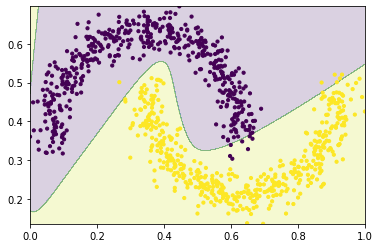

In [104]:
# Define region of interest by data limits
steps = 1000
x_span = np.linspace(X[0, :].min(), X[0, :].max(), steps)
y_span = np.linspace(X[1, :].min(), X[1, :].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
ax.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())